In [35]:
import pandas as pd
iris = pd.read_csv('./input_data/iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
iris['data_version'] = 1.0
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,data_version
0,5.1,3.5,1.4,0.2,setosa,1.0
1,4.9,3.0,1.4,0.2,setosa,1.0
2,4.7,3.2,1.3,0.2,setosa,1.0
3,4.6,3.1,1.5,0.2,setosa,1.0
4,5.0,3.6,1.4,0.2,setosa,1.0


In [37]:
from sqlalchemy import create_engine

import os
pgconfig = {
    'host': os.environ['DB_HOST'],
    'port': os.environ['DB_PORT'],
    'database': os.environ['DB_NAME'],
    'user': os.environ['DB_USER'],
    'password': os.environ['DB_PASSWORD']
}

engine = create_engine('postgresql+psycopg2://{user}:{password}@{host}/{database}'.format(**pgconfig))

In [38]:
columns = ['data_version',
                  'sepal_length',
                  'sepal_width',
                  'petal_length',
                  'petal_width']

iris[columns].to_sql('iris_input', engine, if_exists='append', index=False)

In [39]:
%load_ext sql
dsl = 'postgres://{user}:{password}@{host}:{port}/{database}'.format(**pgconfig)
%sql $dsl

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: postgres@analysis'

In [40]:
%config SqlMagic.autopandas = True
df_input = %sql select * from iris_input
df_input.head()

 * postgres://postgres:***@db:5432/analysis
600 rows affected.


,id,data_version,sepal_length,sepal_width,petal_length,petal_width,create_timestamp
0,1,1.0,5.1,3.5,1.4,0.2,2019-10-18 17:03:48.453711
1,2,1.0,4.9,3.0,1.4,0.2,2019-10-18 17:03:48.453711
2,3,1.0,4.7,3.2,1.3,0.2,2019-10-18 17:03:48.453711
3,4,1.0,4.6,3.1,1.5,0.2,2019-10-18 17:03:48.453711
4,5,1.0,5.0,3.6,1.4,0.2,2019-10-18 17:03:48.453711


In [41]:
df_src = df_input[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_src.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1,

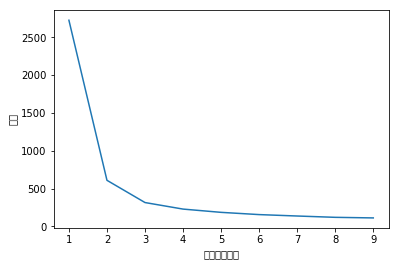

In [44]:
from sklearn.cluster import KMeans

dist_sums = []
for cluster_cnt in range(1, 10):
    kms = KMeans(n_clusters=cluster_cnt, random_state=1)
    kms.fit_predict(df_src)
    dist_sums.append(kms.inertia_)
    
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1,10), dist_sums)
plt.xlabel('クラスター数')
plt.ylabel('距離')

kms = KMeans(n_clusters=3, random_state=1)
clusters = kms.fit_predict(df_src)
clusters

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca_value = pca.fit_transform(df_src)

In [46]:
df_pca = pd.DataFrame(pca.transform(df_src), columns=['pca1', 'pca2'])
df_pca.head()

,pca1,pca2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [47]:
df_plot = df_pca.assign(cluster_id=clusters)
df_plot.head()

,pca1,pca2,cluster_id
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


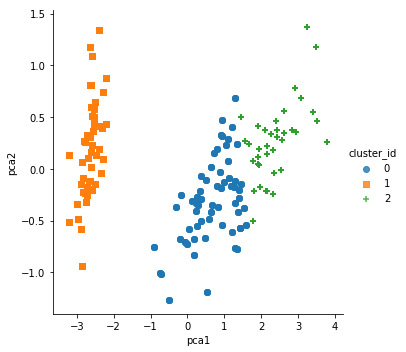

In [48]:
%matplotlib inline
import seaborn as sns

sns.lmplot(x='pca1', y='pca2', data=df_plot, hue='cluster_id', markers=['o', 's', '+'], fit_reg=False)

In [50]:
df_input.head()

,id,data_version,sepal_length,sepal_width,petal_length,petal_width,create_timestamp
0,1,1.0,5.1,3.5,1.4,0.2,2019-10-18 17:03:48.453711
1,2,1.0,4.9,3.0,1.4,0.2,2019-10-18 17:03:48.453711
2,3,1.0,4.7,3.2,1.3,0.2,2019-10-18 17:03:48.453711
3,4,1.0,4.6,3.1,1.5,0.2,2019-10-18 17:03:48.453711
4,5,1.0,5.0,3.6,1.4,0.2,2019-10-18 17:03:48.453711


In [51]:
df_save_target = df_plot.assign(id=df_input[['id']], data_version=df_input[['data_version']])
df_save_target.head()

,pca1,pca2,cluster_id,id,data_version
0,-2.684126,0.319397,1,1,1.0
1,-2.714142,-0.177001,1,2,1.0
2,-2.888991,-0.144949,1,3,1.0
3,-2.745343,-0.318299,1,4,1.0
4,-2.728717,0.326755,1,5,1.0


In [52]:
df_save_target[['id', 'data_version', 'pca1', 'pca2', 'cluster_id']].to_sql('iris_cluster', engine, if_exists='append', index=False)

In [53]:
%sql select * from iris_cluster limit 10;

 * postgres://postgres:***@db:5432/analysis
10 rows affected.


,id,data_version,pca1,pca2,cluster_id
0,1,1.0,-2.684126,0.319397,1
1,2,1.0,-2.714142,-0.177001,1
2,3,1.0,-2.888991,-0.144949,1
3,4,1.0,-2.745343,-0.318299,1
4,5,1.0,-2.728717,0.326755,1
5,6,1.0,-2.280860,0.741330,1
6,7,1.0,-2.820538,-0.089461,1
7,8,1.0,-2.626145,0.163385,1
8,9,1.0,-2.886383,-0.578312,1
9,10,1.0,-2.672756,-0.113774,1
